<a href="https://colab.research.google.com/github/DannMacias/ztm_pytorch/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> 03. PyTorch Computer Vision </b>

**Computer vision** is the art of teaching a computer to see.

Applications of compuer vision:
* Binary classification.
* Multi-class classification.
* Object detection - identifying where a car appears in a video frame.
* [Panoptic segmentation](https://arxiv.org/abs/1801.00868) - figuring out where different objects in an image can be separated.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)



# 0. Computer vision libraries in PyTorch

|**PyTorch module**|**What does it do?**|
|-|-|
|[`tochvision`](https://pytorch.org/vision/stable/index.html)| Contains datasets, model architectures and image transformations|
|[`tochvision.datasets`](https://pytorch.org/vision/stable/datasets.html)| You'll find many example computer vision datasets |
|[`tochvision.models`](https://pytorch.org/vision/stable/models.html)| Contains well-performing and commonly used computer vision model architectures|
|[`tochvision.transforms`](https://pytorch.org/vision/stable/transforms.html)| Often images need to be transform (turned into numbers), common image transformations are found here |
|[`toch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)| Base dataset class for PyTorch |
|[`toch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data)| Creates a Python iterable over a dataset |




In [1]:
# Import PyTorch
import torch
from torch import nn

# Impor Torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

print(f"PyTorch version:{torch.__version__}\n torchvision version:{torchvision.__version__}")

PyTorch version:1.12.1+cu113
 torchvision version:0.13.1+cu113


# 1. Getting a dataset

The FashionMNIST dataset (MNIST stands for Modified National Institute of Standars amd Technology), made by Zalando Research contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets` including FashionMNIST in `torchvision.datasets.FashionMNIST()`. 

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transform` - what transformations would yo like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(), # images come as PIL format, we want in tensors
    target_transform = None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False, # get test data
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

## Input and outpur shapes of a computer vison model

We've got a big tensor of values (the image) leading to a single value for the target (the label)

In [4]:
# Image shape
image.shape

torch.Size([1, 28, 28])

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Various problems will have various input and output shapes. But the premise reamins: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.*

* If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the RGB color model).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width). There's debate on wheter images should be represented as `CHW` (color channel first) or `HWC` (color channel last).

> **Note**: You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`.

PyTorch accepts `NCHW` (color channels first) as the default, but `NHWC` (color channel last) perform better and is considered best practice.

Keep it in mind for larger image datasets and using convolutional neural networks.


In [5]:
# Number of samples
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# Classes of the dataset
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Because we're workimg with 10 different classes, it means our problem is **multi-class classification**

## Visualizing our data



Image shape:torch.Size([1, 28, 28])


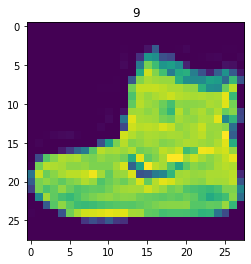

In [7]:
# See the first sample image
image, label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28]
plt.title(label);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

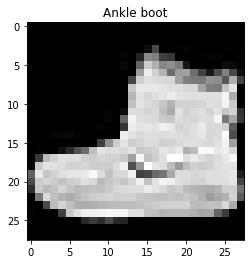

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Let's view a few more.

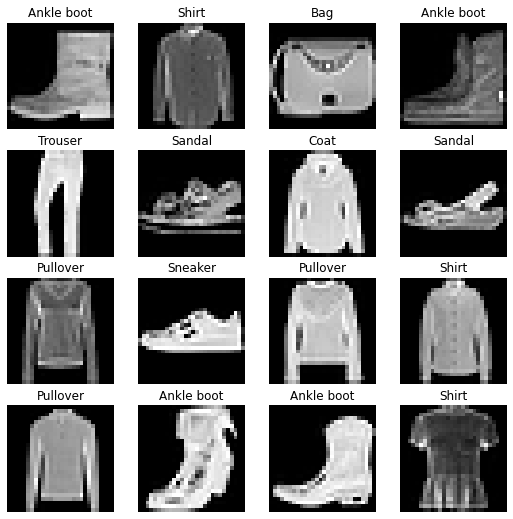

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

# 2. Prepare DataLoader

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

DataLoader turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter - More computationally efficient.

> With mini-batches (small portions of the data), gradient descent is performed more often per epoch (one per mini-batch rather than once per epoch).

**WHAT'S A GOOD BATCH SIZE?**

32 is a good place to start for a fair amount of problems.

> With BN (Batch normalization) and larger datasets, larger batch size can be useful, up to size $m=32$ or $m=64$.
>
>Masters, D., & Luschi, C. (2018). Revisiting Small Batch Training for Deep Neural Networks. arXiv. https://doi.org/10.48550/arXiv.1804.07612

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g., 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader` for our training and test sets.

In [10]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn iterable
                              batch_size = BATCH_SIZE, # how many samples per batch?
                              shuffle = True # shufle data every epoch?
                              )

test_dataloader = DataLoader(test_data, 
                             batch_size = BATCH_SIZE,
                             shuffle = False #  don't necessarily have to shuffle the testing data
                             )

# Let's check out what we've created
print(f"Dataloaders:{train_dataloader, test_dataloader}")
print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7feea3622310>, <torch.utils.data.dataloader.DataLoader object at 0x7feea3628050>)
Length of train dataloader:1875 batches of 32
Length of test dataloader:313 batches of 32


In [11]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image size:torch.Size([1, 28, 28])
Label:6, label size:torch.Size([])


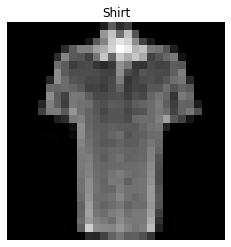

In [12]:
# Shoe a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

print(f"Image size:{img.shape}")
print(f"Label:{label}, label size:{label.shape}")

# 3. Model 0: Build a baseline model

A **baseline model** is one of the simplest models you can image. You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

* Our baseline will consist of two `nn.Linear()` layers.
* And the `nn.Flatten()` layer - compresses the dimensions of a tensor into a single vector.

In [13]:
# Create a flatten layer
flatten_model = nn.Flatten() 

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform foward pass

# Print out what happened
print(f"Shape before flattening:{x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening{output.shape} -> [color_channels, height*widht]")

Shape before flattening:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flatteningtorch.Size([1, 784]) -> [color_channels, height*widht]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

**Why do this?** Because we've now turned our pixel data from height and width dimensions into one long **feature vector**. And `nn.Linear()` layers like their inputs to be in the form of features vectors.

Let's create our first model using `nn.Flatten()` as the first layer.

In [14]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs in vector form
        nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = 784 pixels
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  
  def forward(self, x):
    return self.layer_stack(x)

For instantiate a model we'll need to set the following parameters:
* `input_shape=784`- this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification proble,. we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now.

In [15]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our `helper_function.py` script

In [16]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [17]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Creating a funcion to time experiments

Let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

In [18]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  """
  Prints difference between star and end time.

  Arg:
    start (float): Start time of computation (preferred in timeit format).
    end (float): End time of computation.
    device ([type], optional): Device that compute is running on. Defaults to None
  
  Returns:
    float: time between star and end in seconds (higher is longer)
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## Creating a training loop and training a model on batches of data

Our data batches are contained within our `DataLoader`, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A bacth is `BATCH_SIZE` samples of `X` (features) and `Y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

In short:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all

>```
Augmented assignment is the combination, in a single statement, of a
binary operation and an assignment statement:
>
>An augmented assignment expression like "x += 1" can be rewritten as
"x = x + 1" to achieve a similar, but not exactly equal effect. In the
augmented version, "x" is only evaluated once.
>
>Unlike normal assignments, augmented assignments evaluate the left-
hand side *before* evaluating the right-hand side.  For example, "a[i]
+= f(x)" first looks-up "a[i]", then it evaluates "f(x)" and performs
the addition, and lastly, it writes the result back to "a[i]".
```

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n--------")
  ### TRAINING
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X, Y) in enumerate(train_dataloader):
    model_0.train()
    Y_pred = model_0(X)

    loss = loss_fn(Y_pred, Y)
    train_loss += loss # accumulatively add up the loss per epoch

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  
  # Divide total train loss by lenght of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

  ### TESTING
  # Setup variables for accumalatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, Y in test_dataloader:
      test_pred = model_0(X)

      test_loss += loss_fn(test_pred, Y)  # accumulatively add up the loss per epoch
      test_acc += accuracy_fn(y_true=Y, y_pred=test_pred.argmax(dim=1))
    
    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)

    # Divide total accuracy by lenght of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.00025 | Test loss: 0.50954, Test acc: 82.04%

Epoch:1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.00032 | Test loss: 0.47989, Test acc: 83.20%

Epoch:2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.00017 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 24.247 seconds


# 4. Make predictions and get Model 0 results

Let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [20]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
    data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
    loss_fn (torch.nn.Module): The loss function of model.
    accuracy_fn: An accuracy function to compare the models predictions to the truth lables

  Returns:
    (dict): Results of model making predictions on data loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, Y in data_loader:
      # Make predictions with the model
      Y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(Y_pred, Y)
      acc += accuracy_fn(y_true=Y,
                         y_pred=Y_pred.argmax(dim=1)) # For accuracy need the prediction labels (logits -> pred_probs -> pred_labels)
      
    # Scale loss amd acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__, # # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}

In [21]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0, 
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 5. Setup device agnostic-code (for using a GPU if there is one)



In [22]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 6. Moddel 1: non-linearity

In [23]:
# Create a model with non-linearity and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

> **Note**: Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers.
>
> This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again.


We'll need:
* `input_shape = 784`
* `hidden_units = 10`
* `output_shape = len(class_names)`

In [24]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, 
                              hidden_units = 10, 
                              output_shape = len(class_names)
                              ).to(device)

next(model_1.parameters()).device # Check model device

device(type='cuda', index=0)

## Setup loss, optimizer and evaluation metrics

In [25]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## Functionizing training and test loops

Let's write a train and test loops again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll sure to call `.to(device)` on our feature (`X`) and target (`Y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

In [26]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  for batch, (X, Y) in enumerate(data_loader):
    # Send data to GPU
    X, Y = X.to(device), Y.to(device)

    # 1. Forward pass
    Y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(Y_pred, Y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = Y,
                             y_pred = Y_pred.argmax(dim=1)) # Go from logits to predictions

    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Calculate the loss and accuracy per epoch and print out
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss:{train_loss:.5f} | Train accuracy:{train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model : torch.nn.Module,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, Y in data_loader:
      # Sen data to GPU
      X, Y = X.to(device), Y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss and accuracy
      test_loss += loss_fn(test_pred, Y)
      test_acc += accuracy_fn(y_true=Y,
                              y_pred=test_pred.argmax(dim=1)) # Go from logits to pred labels
    
    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss:{test_loss:.5f} | Test accuracy:{test_acc:.2f}%\n")

Let's also time things to see how long our code takes to run on the GPU.

In [27]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n----------")

  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn
             )
  test_step(data_loader = test_dataloader,
            model = model_1,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn
            )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----------
Train loss:1.09199 | Train accuracy:61.34%
Test loss:0.95636 | Test accuracy:65.00%

Epoch:1
----------
Train loss:0.78101 | Train accuracy:71.93%
Test loss:0.72227 | Test accuracy:73.91%

Epoch:2
----------
Train loss:0.67027 | Train accuracy:75.94%
Test loss:0.68500 | Test accuracy:75.02%

Train time on cuda: 25.769 seconds


**I used a GPU but my model didn't train faster, why might that be?**

One reason could be because your dataset and model are both so small the benefits of using a GPU are outweighed by the time it actually takes to transsfer the data there.

There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.

> For smaller model and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweights the cost of getting the data there.

For make evaluations using `eval_model()` we need to change the function (send to device).

In [28]:
# Make values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """
  Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
    data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
    loss_fn (torch.nn.Module): The loss function of model.
    accuracy_fn: An accuracy function to compare the models predictions to the truth lables

  Returns:
    (dict): Results of model making predictions on data loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, Y in data_loader:
      # Send data to the target device
      X, Y = X.to(device), Y.to(device)

      # Make predictions with the model
      Y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(Y_pred, Y)
      acc += accuracy_fn(y_true=Y,
                         y_pred=Y_pred.argmax(dim=1)) # For accuracy need the prediction labels (logits -> pred_probs -> pred_labels)
      
    # Scale loss amd acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__, # # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}

In [29]:
# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [30]:
# Check the baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In this case, it looks like ***adding non-linearities to our model made it perform worse than the baseline***.

From the looks of things, it seems like our model is **overfitting** on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:
1. Using a smaller or different model (some models fit certain kinds of data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

In the meantime, let's take a look at number 1: using a different model.

#7. Model 2: Building a Convolutional Neural Network (CNN)

[**Convolutional Neural Network**](https://poloclub.github.io/cnn-explainer/) (CNN or ConvNet) are know for their capabilities to find patterns in visual data.

> In a CNN, the input tensor with shape `[batch, height, width, color_channels]`. >
>
>After passing through a convulational layer, the image becomes abstracted to a **feature map**, also called an **activation map**, with shape `[batch, feature_map_height, feature_map_width, feature_map_color_channels]`.

The CNN model we're going to be using is known as TinyVGG.

It follows the typical structure of a CNN:

```
Input_layer -> [Convolutional layer -> activation_layer -> pooling_layer] -> Output_layer
```

Where the contents of `[Convolutional layer -> activation_layer -> pooling_layer]` can be upscaled and repeated multiple times, depending on requirements.

**WHAT MODEL SHOULD I USE?**

|**Problem type**|**Model to use (generally)**|**Code example**|
|-|-|-|
|Structured data|Gradient boosted models, Random Forest, XGBoost|`sklearn.ensemble`, XGBoost library|
|Unstructured data|CNN, Transformers|`torchvision.models`, [HuggingFace Transformers](https://huggingface.co/docs/transformers/index)|


Let's now build a CNN model using [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.



[**CONV2D**](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

Applies a 2D convulational over an input signal composed of several inpt planes.

In the simplest case, the output of the layer with input size $(N, C_{\text{in}}, H, W)$ and output $(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})$ can be precisely described as:

$$
\text{out}(N_i, C_{out_j}) = \text{bias}(C_{\text{out}_j}) + \sum_{k=0}^{C_{\text{in}-1}}\text{weight}(C_{\text{out}_j}, k)\star \text{input}(N_i, k)
$$

where $\star$ is the valid 2D cross-correlation operator, $N$ is the batch size, $C$ denotes a number of color channels, $H$ is a height of input planes in pixels, and $W$ is width in pixels.




> **Glossary**
> cross-correlation: (covarianza) medida de la similitud entre dos señales, frecuentemente usada para encontrar características relevantes en una señal desconocida por medio de la comparación con otra que sí se conoce.

In [31]:
# Create a convolutional neural network (CNN)
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture copying TinyVG from:
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # how big is the square that's going over the image
                  stride=1, # default
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, 
                     stride=2) # default stride value is same as kernel_size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # Where did this in_features shape come from?
        # It's because each layer of our network compresses and changes the shape of our inputs data.
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  
  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    #print(x.shape)
    x = self.block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

> What we've done is a common practice in machine learning. 
>
> Find a model architecture somewhere and replicate it with code.

## Stepping through `nn.Conv2d()`

The two new layers we've added:
* `nn.Conv2d()` - convolutional layer.
* `nn.MaxPool2d()` - max pooling layer.

> **What does the "2d" in `nn.Conv2d()` stand for?**
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimensions but each of the color channel dimensions have two dimensions too: height and width.

To test the layers out, let's creare some joy data:

In [32]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape:{images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape:{test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape:torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape:torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0

Let's create an example `nn.Conv2d()` with varios parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default:0.

In [33]:
torch.manual_seed(42)

# Create a conolutional layer with same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(test_image)

tensor([[[ 0.6552,  0.5381,  0.4456,  ...,  0.3679,  0.1734,  0.2343],
         [ 0.4011,  0.2772,  0.4309,  ...,  0.0474,  0.3547,  0.4406],
         [ 0.5072,  0.6963,  0.3967,  ...,  0.5034,  0.3260,  0.4359],
         ...,
         [ 0.3767,  0.4173,  0.7551,  ...,  0.5548,  0.5815,  0.2547],
         [ 0.4143,  0.6770,  0.5922,  ...,  0.7285,  0.3320,  0.5752],
         [ 0.1725,  0.3980,  0.5999,  ...,  0.4316,  0.5133,  0.3385]],

        [[ 0.0954, -0.0688, -0.1089,  ...,  0.0185, -0.4996, -0.0184],
         [-0.0188, -0.1703, -0.1344,  ..., -0.2991, -0.0339,  0.1632],
         [-0.1585, -0.0837, -0.0159,  ...,  0.0026,  0.1540, -0.1372],
         ...,
         [-0.0297, -0.0980, -0.0731,  ...,  0.0623, -0.1080, -0.0946],
         [-0.1508, -0.1934,  0.2011,  ...,  0.0415, -0.0989,  0.2556],
         [ 0.0447,  0.1020, -0.1685,  ...,  0.0908, -0.0682, -0.2266]],

        [[ 0.0098,  0.1790,  0.3092,  ...,  0.2502,  0.2292, -0.0542],
         [-0.0979,  0.1598,  0.1165,  ..., -0

If we try to pass a single image in, we get a shape mistmach error:

```
RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead
```
This is because our `nn.Conv2d()` layer expects a 4-dimensional tensor as input size `[N, C, H, W]`.

Right now our single image `test_image` only has a shape of `[C, H, W]`.

We can fix for a single image using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [34]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [35]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [36]:
conv_layer(test_image).shape

torch.Size([10, 62, 62])

What if we changed the value of `conv-layer`?

In [37]:
torch.manual_seed(42)

# Change kernel_size (tuple) and stride
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5, 5),
                         stride=2,
                         padding=0)

conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

We get another shape. Now our image is of shape `[1, 10, 30, 30]`.

**What's going on here?**

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is *how* the different layer calculate their parameter updates or in PyTorch terms, the operation present in the layer `forward()` method.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [38]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

A bunch of random numbers for a weight and bias tensor.

The shapes of these are manipulated by the inputs we passes to `nn.Conv2d()` when we set it up.

In [39]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_chanels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_chanels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


## Stepping through `nn.MaxPool2d()`

Now let's check out what happens when we move data through `nn.MaxPool2d()`.

In [40]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


The `kernel_size` of the `nn.MaxPool2d()` layer will effects the size of the output shape. In our case, the shape halves from `62x62` image to `31x31` image.

Let's see this work with a smaller tensor.

In [41]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our image
random_tensor = torch.randn(size=(1, 1, 4, 4))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape:{random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=4)

# Pass the randoms tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- maximun value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]])
Random tensor shape:torch.Size([1, 1, 4, 4])

Max pool tensor:
tensor([[[[1.9269]]]]) <- maximun value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In essence, they get halved.

The value leftover in `max_pool_tensor` is the **maximum** value from `random_tensor`.

**WHAT'S HAPPENING HERE?**

> <b> Every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space </b>

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being *smaller* in size than the original values.

From an AI perspective, you could consider the whole goal of a neural network to *compress* information.

![each layer of a neural network compresses the original input data into a smaller representation that is (hopefully) capable of making predictions on future input data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This is the idea of use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a `nn.Conv2d()` layer.

Except instead of just taking the maximum, the `nn.Conv2d()` performs a convolutional operation on the data.

![](https://miro.medium.com/max/640/1*ikyQTwVZ28mjvWwf6IavfQ.png)

## Setup a loss function and optimizer for `model_2`


In [42]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

## Training and testing `model_2` using our training and test functions



In [43]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and tes model
# Use train_step() and test_step()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(data_loader = train_dataloader,
             model = model_2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device
             )
  test_step(data_loader = test_dataloader,
            model = model_2,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device
            )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss:0.59560 | Train accuracy:78.37%
Test loss:0.39651 | Test accuracy:85.90%

Epoch: 1
----------
Train loss:0.36302 | Train accuracy:86.88%
Test loss:0.35470 | Test accuracy:86.80%

Epoch: 2
----------
Train loss:0.32366 | Train accuracy:88.22%
Test loss:0.32010 | Test accuracy:88.51%

Train time on cuda: 36.673 seconds


Le's evaluate `model_2` results with our `eval_model()` function.

In [44]:
# Get model_2 (CNN) results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3201005160808563,
 'model_acc': 88.50838658146965}

#8. Compare model results and training time



We've trained three different models:
1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explanier website.

Let's combine our model results dictionaries into a DataFrame and find out.

In [45]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320101,88.508387


We can add the training values too.

In [46]:
# Add training times to results comparison
compare_results["training_time (s)"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time (s)
0,FashionMNISTModelV0,0.476639,83.426518,24.246880
1,FashionMNISTModelV1,0.685001,75.019968,25.768627
2,FashionMNISTModelV2,0.320101,88.508387,36.672802


It looks like our CNN (`FashionMNISTModelV2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (`FashionMNISTModelV0`) performed better than `model_1` (`FashionMNISTModelV1`) but took longer to train (this is likely because we used a CPU to train `model_0` but a GPU to train `model_1`).

The tradeoffs here are known as the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with `model_2`).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

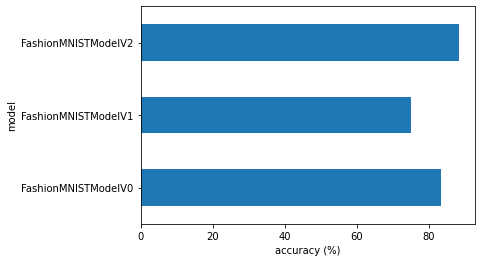

In [47]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

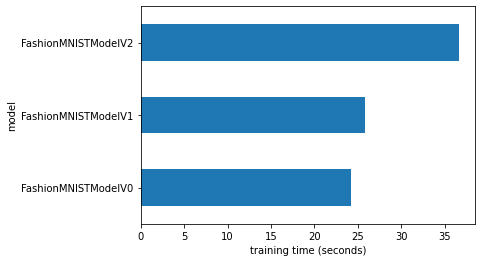

In [49]:
# Visualize our model results
compare_results.set_index("model_name")["training_time (s)"].plot(kind="barh")
plt.xlabel("training time (seconds)")
plt.ylabel("model");

#9. Make and evaluate random predictions with best model

Let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [50]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension

      # Forward pass (model outpurs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for futher calculations
      pred_probs.append(pred_prob.cpu())
  
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [51]:
import random
random.seed(30)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 0 (T-shirt/top)


In [52]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two predictions probabilities list
pred_probs[:2]

tensor([[4.6714e-02, 6.1189e-03, 1.9019e-02, 6.0005e-03, 6.4349e-04, 4.1197e-04,
         2.7192e-01, 5.1287e-04, 6.4852e-01, 1.3411e-04],
        [2.0145e-04, 2.6666e-05, 5.6509e-01, 2.1643e-04, 4.1103e-01, 2.3832e-06,
         2.3266e-02, 8.0339e-06, 1.1539e-04, 4.8643e-05]])

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [53]:
# Turn the prediction probabilites into prediction labels by takimg the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 2, 8, 4, 9, 9, 1, 9, 3])

In [54]:
test_labels, pred_classes

([0, 2, 8, 4, 9, 9, 1, 9, 3], tensor([8, 2, 8, 4, 9, 9, 1, 9, 3]))

Now our predicted classes are in the same format as our test labels, we can compare.

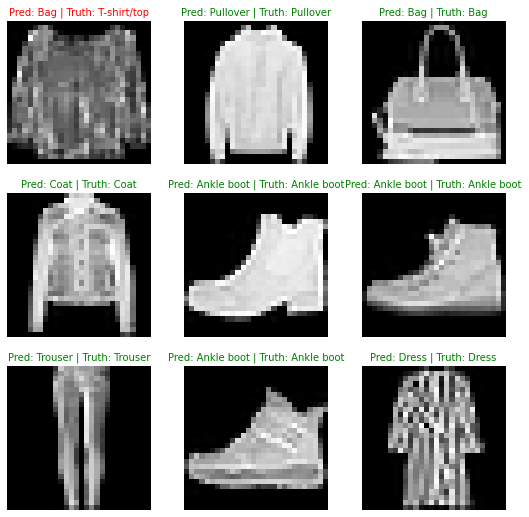

In [55]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

# 10. Making a confusion matrix

[**Simple guide to confusion matrix terminology**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

A **confusion matrix** is a table is often used to describe the performnce of a classification model on a set of test data for which the true values are known.

* **True positives (TP)** - we predicted yes and the true is yes.
* **True negatives (TN)** - we predicted no and the true is no.
* **False positives (FP)** - we predicted yes and the true is no (Type I error).
* **False negatives (FN)** - we predicted no and the true is yes (Type II error).

Example, for a binary classification:

|n = 165|**Predicted: NO**|**Predicted: YES**|
|-|-|-|
|**Actual: No**|TN = 50|FP = 10|
|**Actual: YES**|FN = 5|TP = 100|

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2`.
2. Make a confusion matrix using [`torch.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).


In [56]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, Y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, Y = X.to(device), Y.to(device)
    # Forward pass
    y_logit = model_2(X)
    # Turn predictions from logits
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

We'll need to make sure we've got `torchmetrics` and `mlxtend` installed.

In [57]:
# See if torchmetrics exists, if not, intall it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, ",mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     |████████████████████████████████| 529 kB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
mlxtend version: 0.21.0


In [58]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 

0.21.0


First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (`preds=y_pred_tensor`) and targets (`target=test_data.targets`).

Finally we can plot our confusion matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

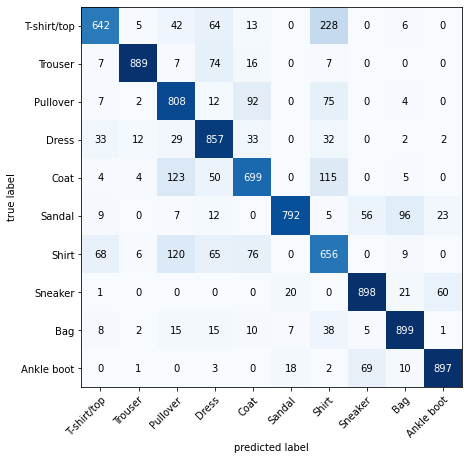

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names = class_names, # turn the row and column lables into class names
    figsize = (10, 7)
);

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful that a single accuracy metric because it tells use where a model is getting things wrong.

It also hints at why the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

# 11. Save and load best performing model



Let's save our `model_2`'s `state_dict()` them load it back in and evaluate it to make sure the save and load went correctly.

In [60]:
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, # create parent directories if needed
                 exist_ok = True # if models directory already exists, don't error
                 )

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), # only saving the state_dict(), the learned parameters
           f = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to creare a new instance of `FahionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [64]:
# Create a new instance of FashionMNISTModelV2
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = 10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Sen model to GPU
loaded_model_2 = loaded_model_2.to(device)

And now we've got a loaded model we can evaluate it with `eval_model()` to make sure its parameters work similarly to `model_2` prior to saving.

In [65]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3201005160808563,
 'model_acc': 88.50838658146965}

In [66]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3201005160808563,
 'model_acc': 88.50838658146965}

In [67]:
loaded_model_2_results == model_2_results

True

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [68]:
 # Check to see if results are close to each other
 torch.isclose(torch.tensor(model_2_results["model_loss"]),
               torch.tensor(loaded_model_2_results["model_loss"]),
               atol = 1e-08, # absolute tolerance
               rtol = 0.0001) # relative tolerance

tensor(True)